<a href="https://colab.research.google.com/github/rahiakela/kaggle-competition-projects/blob/master/plant_pathology_2020_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Pathology 2020 - FGVC7

**Identify the category of foliar diseases in apple trees**

This competition is part of the Fine-Grained Visual Categorization [FGVC7](https://sites.google.com/view/fgvc7/home) workshop at the Computer Vision and Pattern Recognition Conference [CVPR 2020](http://cvpr2020.thecvf.com/). A panel will review the top submissions for the competition based on the description of the methods provided. From this, a subset may be invited to present their results at the workshop. Attending the workshop is not required to participate in the competition, however only teams that are attending the workshop will be considered to present their work.

There is no cash prize for this competition. Attendees presenting in person are responsible for all costs associated with travel, expenses, and fees to attend CVPR 2020. PLEASE NOTE: CVPR frequently sells out early, we cannot guarantee CVPR registration after the competition's end. If you are interested in attending, please plan ahead.

Reference:

https://www.kaggle.com/shawon10/plant-pathology-eda-and-deep-cnn

https://www.kaggle.com/xhlulu/plant-pathology-very-concise-tpu-efficientnet


## Problem Statement

Misdiagnosis of the many diseases impacting agricultural crops can lead to misuse of chemicals leading to the emergence of resistant pathogen strains, increased input costs, and more outbreaks with significant economic loss and environmental impacts. Current disease diagnosis based on human scouting is time-consuming and expensive, and although computer-vision based models have the promise to increase efficiency, the great variance in symptoms due to age of infected tissues, genetic variations, and light conditions within trees decreases the accuracy of detection.

## Specific Objectives

Objectives of ‘Plant Pathology Challenge’ are to train a model using images of training dataset to:

1. Accurately classify a given image from testing dataset into different diseased category or a healthy leaf; 
2. Accurately distinguish between many diseases, sometimes more than one on a single leaf; 
3. Deal with rare classes and novel symptoms; 
4. Address depth perception—angle, light, shade, physiological age of the leaf; and 
5. Incorporate expert knowledge in identification, annotation, quantification, and guiding computer vision to search for relevant features during learning.

## Data Description

Given a photo of an apple leaf, can you accurately assess its health? This competition will challenge you to distinguish between leaves which are healthy, those which are infected with apple rust, those that have apple scab, and those with more than one disease.

### Files

**train.csv**
* image_id: the foreign key for the parquet files
* combinations: one of the target labels
* healthy: one of the target labels
* rust: one of the target labels
* scab: one of the target labels

**images**

A folder containing the train and test images, in jpg format.

**test.csv**

image_id: the foreign key for the parquet files

**sample_submission.csv**
image_id: the foreign key for the parquet files
combinations: one of the target labels
healthy: one of the target labels
rust: one of the target labels
scab: one of the target labels

## Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

TensorFlow 2.x selected.


## Load dataset from Kaggle

Let's donload datasets from Kaggle.

In [6]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 1.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=8d8cf885acd7cdf96cf15d4531632696696d7007973afedce3d559930f896657
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [7]:
# Try to downlaod data for the plant-pathology-2020 challenge, it will fail.
!kaggle competitions download -c plant-pathology-2020-fgvc7

 98% 763M/779M [00:22<00:00, 56.5MB/s]
100% 779M/779M [00:22<00:00, 36.7MB/s]


In [0]:
# copy kaggle.json file to .kaggle directory
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Now try to downlaod data for the plant-pathology-2020 challenge, it will succeed
!kaggle competitions download -c plant-pathology-2020-fgvc7

### Unzip dataset

In [0]:
import os, shutil
import zipfile

# path to the directory where the original dataset was uncompressed
original_dataset_dir = 'kaggle_plant_pathology_2020_data'

# remove directories if it already exists
shutil.rmtree(original_dataset_dir, ignore_errors=True)

# create directories
os.mkdir(original_dataset_dir)

In [0]:
# unzip dataset
with zipfile.ZipFile("plant-pathology-2020-fgvc7.zip","r") as zip_ref:
    zip_ref.extractall(original_dataset_dir)

### Load label and paths

Load train and test csv files.

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

print(train.shape, test.shape)

(1821, 5) (1821, 1)


In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


### Plot some training plant images

In [0]:
import cv2

x = train['image_id']
img_size = 80

In [12]:
# total image 
train['image_id'].count()

1821

In [0]:
train_image = []
for name in train['image_id']:
  path = os.path.join(original_dataset_dir + '/images/', name + '.jpg')
  img = cv2.imread(path)
  image = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)
  train_image.append(image)

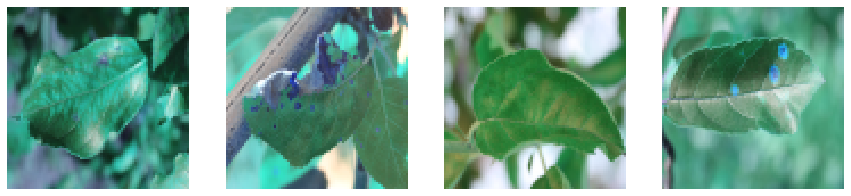

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
  ax[i].set_axis_off()
  ax[i].imshow(train_image[i])

### Plot some testing plant images

In [18]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [0]:
test_images = []
for name in test['image_id']:
  path = os.path.join(original_dataset_dir + '/images/', name + '.jpg')
  img = cv2.imread(path)
  image = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)
  test_images.append(image)

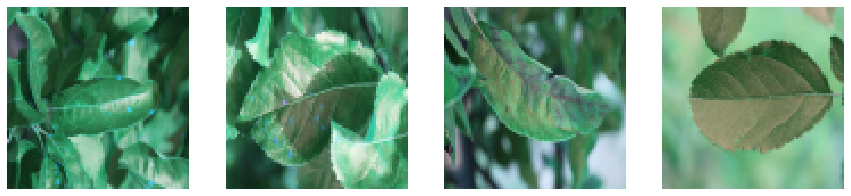

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
  ax[i].set_axis_off()
  ax[i].imshow(test_images[i])